**結果呈現在 Visualization**

## Mount Drive & Import pkgs

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# change dir
import os

In [4]:
import sys
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm
import re

## Read & clean file

In [5]:
data = pd.read_csv('./教科書課文.csv', encoding='utf-8',index_col=False)
len(data)

114

In [6]:
data.head()

,No.,Subject,Grade,Year,Publisher,Type,Lesson,Tittle,Content
0,D001,國語,6下,91,國立編譯館,text,1,生活處處美,"生活處處美\n\n餐桌上的美人\n晚餐時媽媽做了她的拿手好菜—糖醋里肌,材料除了裹粉油炸成金..."
1,D002,國語,6下,91,國立編譯館,text,2,梅樹飄香,"五十多年前的一天,天上飄著細雨,李梅樹走出三峽民生街李家老宅,穿過街旁的小巷,走向祖師廟。這..."
2,D003,國語,6下,91,國立編譯館,text,3,胸有丘壑張大千,"胸有丘壑張大千\n\n一襲長袍,一把長長的鬍鬚,張大千在護士小姐扶持下,顫巍巍的來到那幅巨大..."
3,D004,國語,6下,91,國立編譯館,text,4,天涯若比鄰,"你有沒有想過:當你正興高采烈的和同學玩耍時,在地球遙遠的另一端,那兒的小朋友還沉睡在夢鄉中呢..."
4,D005,國語,6下,91,國立編譯館,text,5,小故事的啟示,"小故事的啟示\n讓路給小鴨子!這是真的嗎?美國鄉村公路上車輛不多,公路兩邊林木茂盛,常會看見..."


In [7]:
df = data[['Grade', 'Year',	'Lesson', 'Tittle', 'Content']]
len(df)

114

In [58]:
# Clean
trash_re = "@\S+|https?:\S+|http?:\S|[^\u4E00-\u9FD5]"

def clean(texts, trash_re):
    output = []
    for text in texts:
        text = re.sub(trash_re, ' ', str(text)) # 以空格取代標點
        output.append(text)
    return output

In [91]:
# process Clean
all_lines = []

for lesson in df['Content'].tolist():
  lines = lesson.splitlines()
  newlines = []
  for l in lines: # 清掉空白句
    if len(l) > 0:
      newlines.append(l)
  all_lines.append(newlines)

In [108]:
# 加回df
df['Content_split'] = all_lines
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Grade,Year,Lesson,Tittle,Content,Content_split
0,6下,91,1,生活處處美,"生活處處美\n\n餐桌上的美人\n晚餐時媽媽做了她的拿手好菜—糖醋里肌,材料除了裹粉油炸成金...","[生活處處美, 餐桌上的美人, 晚餐時媽媽做了她的拿手好菜—糖醋里肌,材料除了裹粉油炸成金黃..."
1,6下,91,2,梅樹飄香,"五十多年前的一天,天上飄著細雨,李梅樹走出三峽民生街李家老宅,穿過街旁的小巷,走向祖師廟。這...","[五十多年前的一天,天上飄著細雨,李梅樹走出三峽民生街李家老宅,穿過街旁的小巷,走向祖師廟。..."
2,6下,91,3,胸有丘壑張大千,"胸有丘壑張大千\n\n一襲長袍,一把長長的鬍鬚,張大千在護士小姐扶持下,顫巍巍的來到那幅巨大...","[胸有丘壑張大千, 一襲長袍,一把長長的鬍鬚,張大千在護士小姐扶持下,顫巍巍的來到那幅巨大的..."
3,6下,91,4,天涯若比鄰,"你有沒有想過:當你正興高采烈的和同學玩耍時,在地球遙遠的另一端,那兒的小朋友還沉睡在夢鄉中呢...","[你有沒有想過:當你正興高采烈的和同學玩耍時,在地球遙遠的另一端,那兒的小朋友還沉睡在夢鄉中..."
4,6下,91,5,小故事的啟示,"小故事的啟示\n讓路給小鴨子!這是真的嗎?美國鄉村公路上車輛不多,公路兩邊林木茂盛,常會看見...","[小故事的啟示, 讓路給小鴨子!這是真的嗎?美國鄉村公路上車輛不多,公路兩邊林木茂盛,常會看..."


In [110]:
df.to_pickle('./textbook_df.pkl')

## WSD

### install import pkgs

In [4]:
!git clone https://github.com/seantyh/dwsd-beta

fatal: destination path 'dwsd-beta' already exists and is not an empty directory.


In [5]:
!pip install -q CwnGraph transformers

     |████████████████████████████████| 5.3 MB 10.5 MB/s 
     |████████████████████████████████| 7.6 MB 36.8 MB/s 
     |████████████████████████████████| 163 kB 61.7 MB/s 


In [6]:
import sys
if "dwsd-beta" not in sys.path:
  sys.path.append("dwsd-beta")

In [7]:
from dotted_wsd import DottedWsdTagger

updating manifest...
manifest version:  v2022.08


In [8]:
tagger = DottedWsdTagger()

downloading image: 18Dmy2fU6qGfFOsS3iCV7j-5u9xz6LfdP...


Downloading...
From: https://drive.google.com/uc?id=18Dmy2fU6qGfFOsS3iCV7j-5u9xz6LfdP
To: /content/drive/MyDrive/研/碩二/語料庫語言學/hw2/cwn-graph-v.2020.05.pyobj
100%|██████████| 24.7M/24.7M [00:00<00:00, 73.7MB/s]


image has downloaded:  cwn-graph-v.2020.05.pyobj


Downloading...
From: https://drive.google.com/uc?id=14Ea1KtIC7zBQ9lFh-vwbKLuiftpabIoo
To: /content/drive/MyDrive/研/碩二/語料庫語言學/hw2/dotted-wsd.zip
100%|██████████| 380M/380M [00:02<00:00, 129MB/s]


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/624 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/269k [00:00<?, ?B/s]

DistilTag

In [9]:
pip install -U DistilTag

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import DistilTag
DistilTag.download()

Downloading...
From: https://drive.google.com/uc?id=1AzUICPQ5MMt_IWg4JZ3mWM6vGbQkv01L
To: /tmp/tmpixgvsrupdistiltag/tagmodel.zip
100%|██████████| 501M/501M [00:04<00:00, 124MB/s]


setting up model...
DistilTag model installed.


In [11]:
from DistilTag import DistilTag
distilTagger = DistilTag()

test = distilTagger.tag('貝多芬今天去台大打球')
test[0]

[('貝多芬', 'Nb'), ('今天', 'Nd'), ('去', 'VCL'), ('台大', 'Nc'), ('打球', 'VA')]

### process df

In [12]:
'''texts: list of lists(Tagged好的sentence) of tuples(lemma)'''
def get_dotted_wsd(texts):  

  id_pattern = '\[(.*?)\]'
  con_pattern = '\((.*?)\)'
  gloss_pattern = '(\[|\()\S+(\]|\))|\s'

  datalist = []
  for sentence in texts:
    tt = tagger.sense_tag_per_sentence(sentence)
    for word in tt:
      one_lemma = word[0]
      one_pos = word[1]
      if len(word[2]) > 0:
        id_search = re.search(id_pattern, word[2])
        con_search = re.search(con_pattern, word[2])

        one_senseID = id_search[0][1:-1]
        one_confidence = con_search[0][1:-1]
        one_gloss = re.sub(gloss_pattern, '', word[2])
      else:
        one_gloss = ''
        one_senseID = ''
        one_confidence = ''
      
      # 一個lemma的資料
      one_data = [one_lemma, one_pos, one_senseID, one_gloss, one_confidence]
      datalist.append(one_data)
      
  return datalist # list of lists(lemma) of string(lemma features)

In [13]:
tagged = distilTagger.tag('我：是誰、你是誰？他,是誰。')
get_dotted_wsd(tagged)

[['我', 'Nh', '05238701', '代指說話者。', '0.7796'],
 ['：', 'COLONCATEGORY', '', '', ''],
 ['是', 'SHI', '07023505', '表後述動作的受事者是前述對象。', '0.9913'],
 ['誰', 'Nh', '04090701', '代指詢問一個或多數的人。', '0.9847'],
 ['、', 'PAUSECATEGORY', '', '', ''],
 ['你', 'Nh', '05238601', '代指單數的聽話者。', '0.6614'],
 ['是', 'SHI', '07023505', '表後述動作的受事者是前述對象。', '0.9959'],
 ['誰', 'Nh', '04090701', '代指詢問一個或多數的人。', '0.9942'],
 ['？', 'QUESTIONCATEGORY', '', '', ''],
 ['他', 'Nh', '05238501', '代指自己和對方以外的第三人。', '0.7466'],
 ['，', 'COMMACATEGORY', '', '', ''],
 ['是', 'SHI', '07023505', '表後述動作的受事者是前述對象。', '0.9968'],
 ['誰', 'Nh', '04090701', '代指詢問一個或多數的人。', '0.9933'],
 ['。', 'PERIODCATEGORY', '', '', '']]

process Content_split

In [14]:
df = pd.read_pickle('./textbook_df.pkl')
df.head()

,Grade,Year,Lesson,Tittle,Content,Content_split
0,6下,91,1,生活處處美,"生活處處美\n\n餐桌上的美人\n晚餐時媽媽做了她的拿手好菜—糖醋里肌,材料除了裹粉油炸成金...","[生活處處美, 餐桌上的美人, 晚餐時媽媽做了她的拿手好菜—糖醋里肌,材料除了裹粉油炸成金黃..."
1,6下,91,2,梅樹飄香,"五十多年前的一天,天上飄著細雨,李梅樹走出三峽民生街李家老宅,穿過街旁的小巷,走向祖師廟。這...","[五十多年前的一天,天上飄著細雨,李梅樹走出三峽民生街李家老宅,穿過街旁的小巷,走向祖師廟。..."
2,6下,91,3,胸有丘壑張大千,"胸有丘壑張大千\n\n一襲長袍,一把長長的鬍鬚,張大千在護士小姐扶持下,顫巍巍的來到那幅巨大...","[胸有丘壑張大千, 一襲長袍,一把長長的鬍鬚,張大千在護士小姐扶持下,顫巍巍的來到那幅巨大的..."
3,6下,91,4,天涯若比鄰,"你有沒有想過:當你正興高采烈的和同學玩耍時,在地球遙遠的另一端,那兒的小朋友還沉睡在夢鄉中呢...","[你有沒有想過:當你正興高采烈的和同學玩耍時,在地球遙遠的另一端,那兒的小朋友還沉睡在夢鄉中..."
4,6下,91,5,小故事的啟示,"小故事的啟示\n讓路給小鴨子!這是真的嗎?美國鄉村公路上車輛不多,公路兩邊林木茂盛,常會看見...","[小故事的啟示, 讓路給小鴨子!這是真的嗎?美國鄉村公路上車輛不多,公路兩邊林木茂盛,常會看..."


In [15]:
all_lessons = []

for lesson in tqdm(df['Content_split'].tolist()):
  datas_of_lesson = []
  for line in tqdm(lesson):
    tagged = distilTagger.tag(line)
    datas_of_line = get_dotted_wsd(tagged)
    datas_of_lesson += datas_of_line

  all_lessons.append(datas_of_lesson)

df['list_of_senses'] = all_lessons
df.to_pickle('./textbook_wsd.pkl')

100%|██████████| 114/114 [23:15<00:00, 12.24s/it]


In [16]:
df.head()

,Grade,Year,Lesson,Tittle,Content,Content_split,list_of_senses
0,6下,91,1,生活處處美,"生活處處美\n\n餐桌上的美人\n晚餐時媽媽做了她的拿手好菜—糖醋里肌,材料除了裹粉油炸成金...","[生活處處美, 餐桌上的美人, 晚餐時媽媽做了她的拿手好菜—糖醋里肌,材料除了裹粉油炸成金黃...","[[生活, Na, 06743601, 日常活動的情況。, 1.0000], [處處, D,..."
1,6下,91,2,梅樹飄香,"五十多年前的一天,天上飄著細雨,李梅樹走出三峽民生街李家老宅,穿過街旁的小巷,走向祖師廟。這...","[五十多年前的一天,天上飄著細雨,李梅樹走出三峽民生街李家老宅,穿過街旁的小巷,走向祖師廟。...","[[五十多, Neu, , , ], [年, Nf, 05229303, 計算時間的單位，一..."
2,6下,91,3,胸有丘壑張大千,"胸有丘壑張大千\n\n一襲長袍,一把長長的鬍鬚,張大千在護士小姐扶持下,顫巍巍的來到那幅巨大...","[胸有丘壑張大千, 一襲長袍,一把長長的鬍鬚,張大千在護士小姐扶持下,顫巍巍的來到那幅巨大的...","[[胸, Na, 05223401, 與臉相同方向動物頸部以下腹部以上的部位，指人或其他動物..."
3,6下,91,4,天涯若比鄰,"你有沒有想過:當你正興高采烈的和同學玩耍時,在地球遙遠的另一端,那兒的小朋友還沉睡在夢鄉中呢...","[你有沒有想過:當你正興高采烈的和同學玩耍時,在地球遙遠的另一端,那兒的小朋友還沉睡在夢鄉中...","[[你, Nh, 05238601, 代指單數的聽話者。, 0.6479], [有沒有, D..."
4,6下,91,5,小故事的啟示,"小故事的啟示\n讓路給小鴨子!這是真的嗎?美國鄉村公路上車輛不多,公路兩邊林木茂盛,常會看見...","[小故事的啟示, 讓路給小鴨子!這是真的嗎?美國鄉村公路上車輛不多,公路兩邊林木茂盛,常會看...","[[小, VH, 05227104, 形容程度低於比較對象的。, 0.4999], [故事,..."


## Sense statistics

### inspect

In [4]:
data = pd.read_pickle('./textbook_wsd.pkl')
data.head()

,Grade,Year,Lesson,Tittle,Content,Content_split,list_of_senses
0,6下,91,1,生活處處美,"生活處處美\n\n餐桌上的美人\n晚餐時媽媽做了她的拿手好菜—糖醋里肌,材料除了裹粉油炸成金...","[生活處處美, 餐桌上的美人, 晚餐時媽媽做了她的拿手好菜—糖醋里肌,材料除了裹粉油炸成金黃...","[[生活, Na, 06743601, 日常活動的情況。, 1.0000], [處處, D,..."
1,6下,91,2,梅樹飄香,"五十多年前的一天,天上飄著細雨,李梅樹走出三峽民生街李家老宅,穿過街旁的小巷,走向祖師廟。這...","[五十多年前的一天,天上飄著細雨,李梅樹走出三峽民生街李家老宅,穿過街旁的小巷,走向祖師廟。...","[[五十多, Neu, , , ], [年, Nf, 05229303, 計算時間的單位，一..."
2,6下,91,3,胸有丘壑張大千,"胸有丘壑張大千\n\n一襲長袍,一把長長的鬍鬚,張大千在護士小姐扶持下,顫巍巍的來到那幅巨大...","[胸有丘壑張大千, 一襲長袍,一把長長的鬍鬚,張大千在護士小姐扶持下,顫巍巍的來到那幅巨大的...","[[胸, Na, 05223401, 與臉相同方向動物頸部以下腹部以上的部位，指人或其他動物..."
3,6下,91,4,天涯若比鄰,"你有沒有想過:當你正興高采烈的和同學玩耍時,在地球遙遠的另一端,那兒的小朋友還沉睡在夢鄉中呢...","[你有沒有想過:當你正興高采烈的和同學玩耍時,在地球遙遠的另一端,那兒的小朋友還沉睡在夢鄉中...","[[你, Nh, 05238601, 代指單數的聽話者。, 0.6479], [有沒有, D..."
4,6下,91,5,小故事的啟示,"小故事的啟示\n讓路給小鴨子!這是真的嗎?美國鄉村公路上車輛不多,公路兩邊林木茂盛,常會看見...","[小故事的啟示, 讓路給小鴨子!這是真的嗎?美國鄉村公路上車輛不多,公路兩邊林木茂盛,常會看...","[[小, VH, 05227104, 形容程度低於比較對象的。, 0.4999], [故事,..."


build WSD df (1 sense per row)

In [110]:
grades, lessons, titles, lemmas, pos, sids, defs = [], [], [], [], [], [], []

for i,r in data.iterrows():
  g = r['Grade']
  les = r['Lesson']
  t = r['Tittle']
  for s in r['list_of_senses']:
    grades.append(g)
    lessons.append(les)
    titles.append(t)
    s = tuple(s[:-1])
    lemmas.append(s[0])
    pos.append(s[1])
    sids.append(s[2])
    defs.append(s[3])

wsd_df = pd.DataFrame({'grade':grades, 'lesson':lessons, 'title':titles, 
                       'lemma':lemmas, 'pos':pos, 'sid':sids, 'definition':defs})


In [111]:
wsd_df[:3]

,grade,lesson,title,lemma,pos,sid,definition
0,6下,1,生活處處美,生活,Na,06743601,日常活動的情況。
1,6下,1,生活處處美,處處,D,,
2,6下,1,生活處處美,美,VH,06634803,形容比喻可以引起他人愉悅情感的。


In [112]:
wsd_df.to_pickle('./wsd_df.pkl')

#### Freq of senses 的，還，就，也，又

In [55]:
targets = ['的','還','就','也','又']
wsd_df.loc[wsd_df['lemma'].isin(targets)].groupby('lemma').size()

lemma
也     251
又     163
就     374
的    3185
還     127
dtype: int64

In [56]:
ddf = wsd_df.loc[wsd_df['lemma'].isin(targets)]

In [58]:
# 的freq
ddf[ddf['lemma']=='的'].groupby('definition').size()

definition
列舉相類似的事物。               838
表一般的修飾關係，用於修飾語和中心語間。    395
表以前述動作的狀態。              460
表使謂語具名詞性，用於主語和謂語間。      395
表前述對象是離合動賓動詞的賓語。          6
表在前述情況下。                277
表對推論的肯定。                 18
表肯定或加強的語氣。              218
表領屬關係，用於修飾語和中心語間。       578
dtype: int64

In [59]:
# 還freq
ddf[ddf['lemma']=='還'].groupby('definition').size()

definition
交回、歸還。             2
恢復、回復原來的狀態。        2
表事情尚未完成。          14
表前述對象符合讓步後的條件。     7
表前述範圍之外有所補充。      71
表動作或情況持續不變。       22
表程度高於比較對象。         1
表超出預料。             5
返回、回來原來的地方。        3
dtype: int64

In [57]:
# 就freq
ddf[ddf['lemma']=='就'].groupby('definition').size()

definition
用於轉折，表與聽話者有共識。                      16
表前述事件為後述事件的充分條件，表示在該條件或情況下自然發展。    159
表前述情況已滿足主觀的最低條件。                     8
表加強說話者對陳述內容的肯定。                     99
表強調說話者已知事實。                         12
表後述事件在很短的時間內完成。                      4
表後述事件發生的時間比預期早。                      7
表後述事件緊接著前述事件發生。                     65
表後述命題和前文相對，具有轉折的語氣。                  2
表無所謂的讓步。                             1
表確定範圍。                               1
dtype: int64

In [60]:
# 也freq
ddf[ddf['lemma']=='也'].groupby('definition').size()

definition
表在特定情況下，沒有一定的作法。     5
表委婉的語氣。             24
表所描述的對象屬於同一類。       81
表示判斷或解釋的語氣。          5
表示疑問或反問的語氣。          2
表與預期的情況相反。          13
表讓步的語氣。              4
表預期會改變的情況維持不變。      34
連接兩個有關連性的事件。        83
dtype: int64

In [61]:
# 又freq
ddf[ddf['lemma']=='又'].groupby('definition').size()

definition
表事件重複發生。                  58
表另外。                       4
表接連發生事件中的後述發生事件。          15
表示加強的語氣。                   4
表轉折。                      10
言談中用來表主題的轉折。               5
連接下一級的計數單位，表示整數之外再加零數。     9
連接兩對等詞組，表兩種狀況同時存在。        58
dtype: int64

#### Distr of grade 的

In [113]:
ddf = wsd_df.loc[wsd_df['lemma'].isin(targets)]

In [114]:
pd.set_option('display.max_rows',None)
pd.DataFrame(ddf[ddf['lemma']=='的'].groupby(['definition','grade']).size()).rename({0:'count'},axis=1)

count
definition           grade       
列舉相類似的事物。            3上        29
                     3下        47
                     4上       114
                     4下        85
                     5上        80
                     5下       139
                     6上       115
                     6下       229
表一般的修飾關係，用於修飾語和中心語間。 3上        18
                     3下        15
                     4上        42
                     4下        46
                     5上        44
                     5下        71
                     6上        42
                     6下       117
表以前述動作的狀態。           3上        33
                     3下        22
                     4上        47
                     4下        29
                     5上        39
                     5下        73
                     6上        84
                     6下       133
表使謂語具名詞性，用於主語和謂語間。   3上         7
                     3下         6
                     4上        36
                     4下        17
                     5上        40
                     5下        69
                     6上        81
                     6下       139
表前述對象是離合動賓動詞的賓語。     3下         1
                     4上         1
                     5上         1
                     5下         1
                     6上         1
                     6下         1
表在前述情況下。             3上        20
                     3下         5
                     4上        19
                     4下        33
                     5上        31
                     5下        57
                     6上        33
                     6下        79
表對推論的肯定。             3下         2
                     4上         1
                     4下         2
                     5上         4
                     5下         4
                     6上         2
                     6下         3
表肯定或加強的語氣。           3上        11
                     3下         4
                     4上        20
                     4下        24
                     5上        27
                     5下        41
                     6上        24
                     6下        67
表領屬關係，用於修飾語和中心語間。    3上        27
                     3下        29
                     4上        68
                     4下        45
                     5上        79
                     5下        81
                     6上        79
                     6下       170

In [115]:
df_DE = pd.DataFrame(ddf[ddf['lemma']=='的']).sort_values(['grade','definition']).reset_index(drop=True)
df_DE

,grade,lesson,title,lemma,pos,sid,definition
0,3上,3,小動物的本事,的,DE,07023408,列舉相類似的事物。
1,3上,3,小動物的本事,的,DE,07023408,列舉相類似的事物。
2,3上,3,小動物的本事,的,DE,07023408,列舉相類似的事物。
3,3上,9,可貴的筆記本,的,DE,07023408,列舉相類似的事物。
4,3上,9,可貴的筆記本,的,DE,07023408,列舉相類似的事物。
5,3上,9,可貴的筆記本,的,DE,07023408,列舉相類似的事物。
6,3上,9,可貴的筆記本,的,DE,07023408,列舉相類似的事物。
7,3上,9,可貴的筆記本,的,DE,07023408,列舉相類似的事物。
8,3上,9,可貴的筆記本,的,DE,07023408,列舉相類似的事物。
9,3上,9,可貴的筆記本,的,T,07023408,列舉相類似的事物。


In [116]:
df_DE.to_csv('./df_DE.csv',encoding='utf-8',index=False)

## Visualization

中文

In [25]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2022-10-24 12:34:12--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.107.101, 142.251.107.139, 142.251.107.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.107.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l2je17136vh4dgg29c6q8f1ng2pp70hl/1666614825000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=5178f0ac-41b1-44a0-ad27-092bf90af5d0 [following]
--2022-10-24 12:34:13--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l2je17136vh4dgg29c6q8f1ng2pp70hl/1666614825000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=5178f0ac-41b1-44a0-ad27-092bf90af5d0
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.97.132, 2607:f8b0:400c:c18::84
Connecting to do

In [6]:
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

group definition

In [8]:
df_DE = pd.read_csv('./df_DE.csv',encoding='utf-8',index_col=False)
df_DE.head()

,grade,lesson,title,lemma,pos,sid,definition
0,3上,3,小動物的本事,的,DE,7023408,列舉相類似的事物。
1,3上,3,小動物的本事,的,DE,7023408,列舉相類似的事物。
2,3上,3,小動物的本事,的,DE,7023408,列舉相類似的事物。
3,3上,9,可貴的筆記本,的,DE,7023408,列舉相類似的事物。
4,3上,9,可貴的筆記本,的,DE,7023408,列舉相類似的事物。


In [11]:
len(list(set(df_DE['definition'].tolist())))

9

In [47]:
df_DE.groupby('definition').size()

definition
列舉相類似的事物。               838
表一般的修飾關係，用於修飾語和中心語間。    395
表以前述動作的狀態。              460
表使謂語具名詞性，用於主語和謂語間。      395
表前述對象是離合動賓動詞的賓語。          6
表在前述情況下。                277
表對推論的肯定。                 18
表肯定或加強的語氣。              218
表領屬關係，用於修飾語和中心語間。       578
dtype: int64

#### Frequency of \'的\' senses

Text(0, 0.5, '')

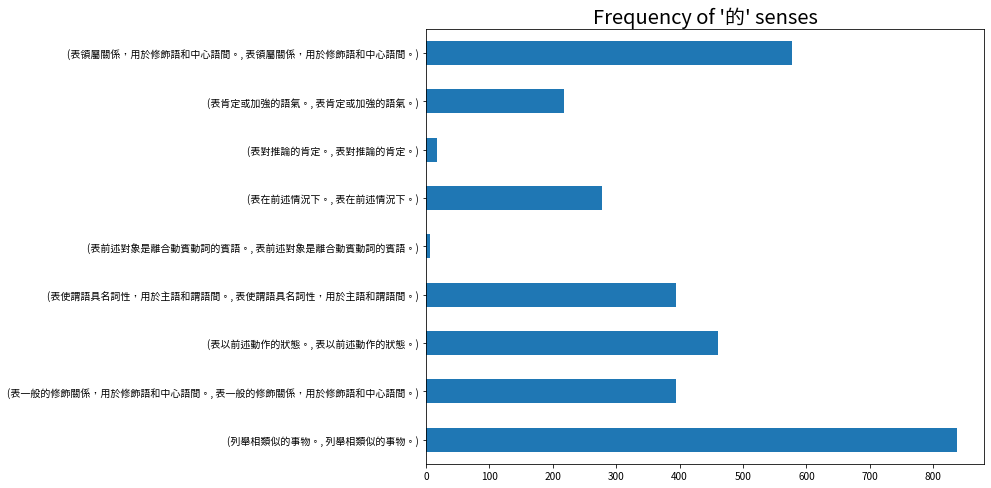

In [44]:
r = df_DE.groupby('definition').definition.value_counts().plot.barh(figsize=(10,8))
r.set_title("Frequency of \'的\' senses",fontdict={'fontsize':20})
r.set_ylabel('')

#### Distribution of \'的\' senses

Text(0.5, 1.0, "Distribution of '的' senses")

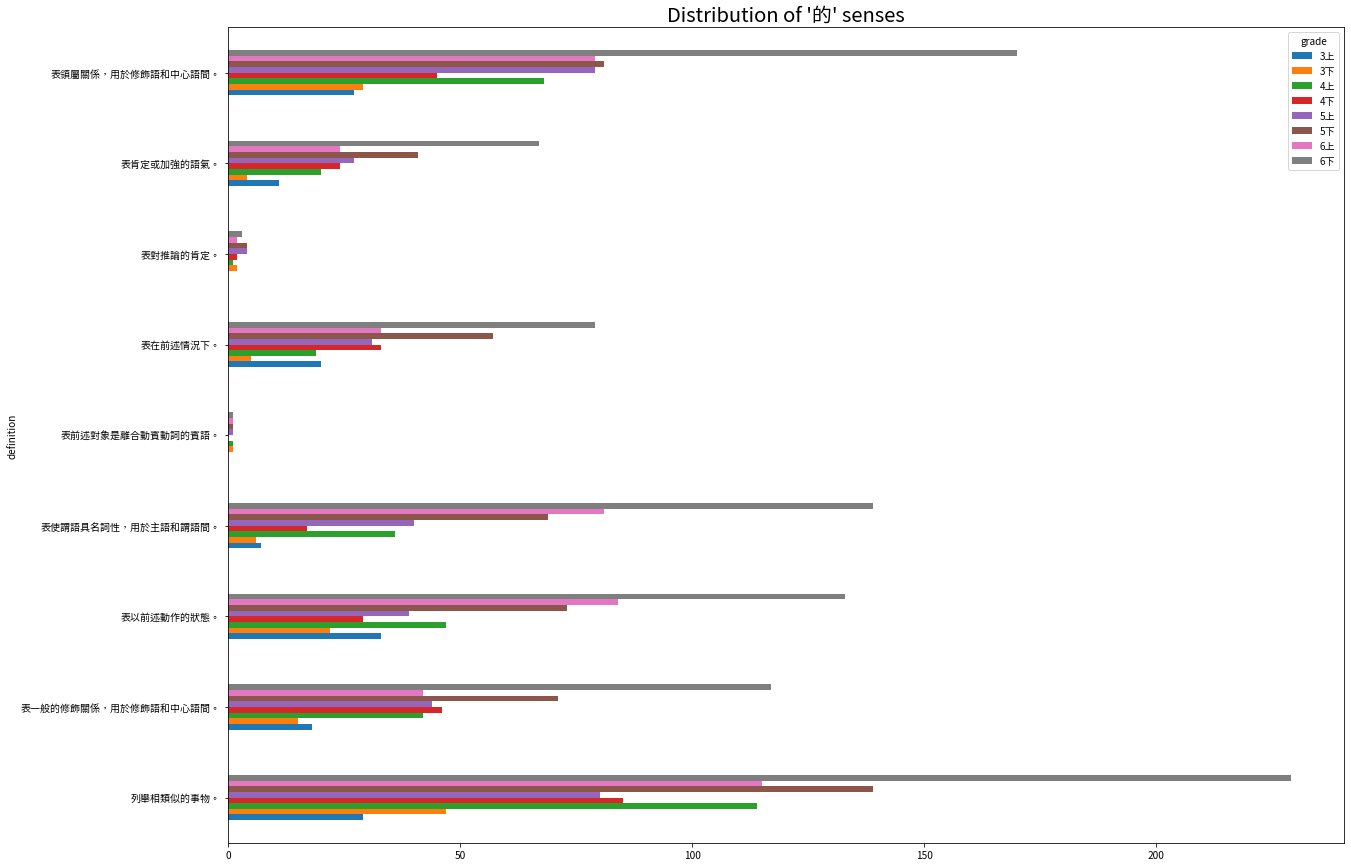

In [36]:
result = df_DE.groupby(['grade']).definition.value_counts().unstack(0).plot.barh(figsize=(20,15))
result.set_title("Distribution of \'的\' senses",fontdict={'fontsize':20})